# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to **import** any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. The dataset is given as .npz file, and will contain data in  numpy array. 

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. You are allowed to use the numpy library to calculate eigen values. All other functions should be written from scratch.

## Change the name of the file you submit with your rollNo_Name.ipynb 
### Eg. CS20B001_FullName.ipynb




In [2]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import matplotlib as mpl
import pandas as pd

Create Directory `../../Data/` and save data files in it.

In [3]:
## MAKE YOUR DIRECTORY STRUCTURE TO CONTAIN DATA FOLDER IN THE FOLLOWING WAY.


dataA = np.load("Data/data1.npz")
dataB = np.load("Data/data2.npz")

print (dataA.files)
print (dataB.files)

## Training data = arr1, arr2 
## Test data = arr3, arr4


['arr1', 'arr2', 'arr3', 'arr4']
['arr1', 'arr2', 'arr3', 'arr4']


# SVM

Write code for learning SVM below. Also write code for choosing **best hyperparameters** for **each kernel** type. You may use `sklearn.svm` for this purpose. _(use a part of training set as validation set)_

Write code for running in the cell after. 

In `text cell` after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for 
* Linear, 
* RBF and 
* Poly kernels.   
Note: Linear has no kernel parameter.   

Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [4]:
# CodeWrite cell
# Write SVM classifier using SKlearn
# write only functions here

def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

def get_val_score(X, y, test_x, test_y, kernel_type):
    
    C = [0.001, 0.01, 0.1, 1, 2, 10, 100, 1000]
    scores = []
    for c in C:
        model = svm.SVC(kernel=kernel_type, C=c)
        model.fit(X, y)
        y_pred = model.predict(test_x)
        score = accuracy_metric(y_pred, test_y)
        scores.append(score)
    
    best_val = max(scores)
    idx = scores.index(best_val)
    best_c = C[idx]
    
    return best_val, best_c

def get_val_score_test(X, y, test_x, test_y, kernel_type, c):
    
    model = svm.SVC(kernel=kernel_type, C=c)
    model.fit(X, y)
    y_pred = model.predict(test_x)
    score = accuracy_metric(y_pred, test_y)
    
    return score

def get_predictions(X, y, test_x, kernel_type, c):
    
    model = svm.SVC(kernel=kernel_type, C=c)
    model.fit(X, y)
    y_pred = model.predict(test_x)
    
    return y_pred

In [5]:
# CodeWrite cell
# Write code here for doing validation (for kernel_param and regularisation_param)
# on a subset of the training set. 
# Also for generating the numbers that you report below.

#validation
data_names = ['Data/data1.npz','Data/data2.npz']
for data_set in data_names :
    d_s_2   = np.load(data_set)
    X_train_ = d_s_2['arr1']
    Y_train_ = d_s_2['arr2']
    
    X_train  = X_train_[:1200][:]
    Y_train  = Y_train_[:1200][:]
    X_test  = X_train_[1200:][:]
    Y_test  = Y_train_[1200:][:]
    
    score_lin, c_lin = get_val_score(X_train, Y_train, X_test, Y_test, 'linear')
    score_rbf , c_rbf = get_val_score(X_train, Y_train, X_test, Y_test, 'rbf')
    score_poly , c_poly = get_val_score(X_train, Y_train, X_test, Y_test, 'poly')
    
    #print("on data : ", data_set)
    #print("best_val_linear : ", score_lin, "best_val_c : ", c_lin)
    #print("best_val_rbf : ", score_rbf, "best_val_c : ", c_rbf)
    #print("best_val_poly : ", score_poly, "best_val_c : ", c_poly)
    
    c_list = []
    c_list.append(c_lin)
    c_list.append(c_rbf)
    c_list.append(c_poly)
 
    scores = []
    scores.append(score_lin)
    scores.append(score_rbf)
    scores.append(score_poly)
    best_kernel = max(scores)
    idx = scores.index(best_kernel)
    kernel = ["linear", "rbf", "poly"]
    #print("best_kernel : ", kernel[idx])
    #print("best_kernel_C : ", c_list[idx])

#test
data_names = ['data1.npz','data2.npz']
for data_set in data_names :
    d_s_2   = np.load(data_set)
    X_train_ = d_s_2['arr1']
    Y_train_ = d_s_2['arr2']
    X_test_ = d_s_2['arr3']
    Y_test_ = d_s_2['arr4']

    C = [0.001, 0.01, 0.1, 1, 2, 10, 100, 1000]
    
    train_score_linear = []
    train_score_rbf = []
    train_score_poly = []
    
    test_score_linear = []
    test_score_rbf = []
    test_score_poly = []

    for c in C:
        train_score_linear.append(100 - get_val_score_test(X_train_, Y_train_, X_train_, Y_train_, 'linear', c))
        train_score_rbf.append(100 - get_val_score_test(X_train_, Y_train_, X_train_, Y_train_, 'rbf', c))
        train_score_poly.append(100 - get_val_score_test(X_train_, Y_train_, X_train_, Y_train_, 'poly', c))
    
    for c in C:
        test_score_linear.append(100 - get_val_score_test(X_train_, Y_train_, X_test_, Y_test_, 'linear', c))
        test_score_rbf.append(100 - get_val_score_test(X_train_, Y_train_, X_test_, Y_test_, 'rbf', c))
        test_score_poly.append(100 - get_val_score_test(X_train_, Y_train_, X_test_, Y_test_, 'poly', c))
    
    
    #print("on data : ", data_set)
    
    #import pandas as pd
    #df1 = pd.DataFrame()
    #df1["linear_C"] = C
    #df1["linear_train_error"] = train_score_linear
    #df1["linear_test_error"] = test_score_linear
    
    #df2 = pd.DataFrame()
    #df2["rbf_C"] = C
    #df2["rbf_train_error"] = train_score_rbf
    #df2["rbf_test_error"] = test_score_rbf
    
    #df3 = pd.DataFrame()
    #df3["poly_C"] = C
    #df3["poly_train_error"] = train_score_poly
    #df3["poly_test_error"] = test_score_poly

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all datasets. 

Paremeter values C = [0.001, 0.01, 0.1, 1, 2, 10, 100, 1000]

Best choice of hyperparameters on validation set :

data1.npz -> Kernel : linear, C : 1

data2.npz -> Kernel : rbf, C : 1

on data :  data1.npz
   linear_C  linear_train_error  linear_test_error
0     0.001           41.933333               46.6
1     0.010           17.000000               18.8
2     0.100           17.466667               19.6
3     1.000           17.800000               20.6
4     2.000           17.666667               21.0
5    10.000           17.666667               20.8
6   100.000           17.666667               20.8
7  1000.000           17.666667               20.8
      rbf_C  rbf_train_error  rbf_test_error
0     0.001        47.133333            49.0
1     0.010        16.800000            18.8
2     0.100        17.533333            20.2
3     1.000        17.466667            20.6
4     2.000        17.533333            20.4
5    10.000        17.466667            20.2
6   100.000        17.466667            19.4
7  1000.000        17.000000            20.0
     poly_C  poly_train_error  poly_test_error
0     0.001         33.266667             35.6
1     0.010         19.600000             21.2
2     0.100         18.200000             20.4
3     1.000         17.600000             20.4
4     2.000         17.400000             20.4
5    10.000         17.533333             20.4
6   100.000         17.600000             20.2
7  1000.000         17.600000             20.2

on data :  data2.npz
   linear_C  linear_train_error  linear_test_error
0     0.001           20.800000               20.4
1     0.010           15.000000               15.2
2     0.100           13.266667               13.4
3     1.000           12.866667               13.4
4     2.000           12.866667               13.2
5    10.000           12.933333               13.4
6   100.000           12.866667               13.2
7  1000.000           12.866667               13.2
      rbf_C  rbf_train_error  rbf_test_error
0     0.001        49.533333            51.4
1     0.010         7.666667             9.8
2     0.100         0.666667             0.4
3     1.000         0.066667             0.2
4     2.000         0.066667             0.2
5    10.000         0.000000             0.2
6   100.000         0.000000             0.2
7  1000.000         0.000000             0.2
     poly_C  poly_train_error  poly_test_error
0     0.001         26.066667             24.6
1     0.010         17.933333             20.2
2     0.100          6.066667              8.2
3     1.000          6.133333              8.4
4     2.000          6.000000              8.4
5    10.000          6.000000              8.2
6   100.000          5.933333              8.0
7  1000.000          5.933333              8.0

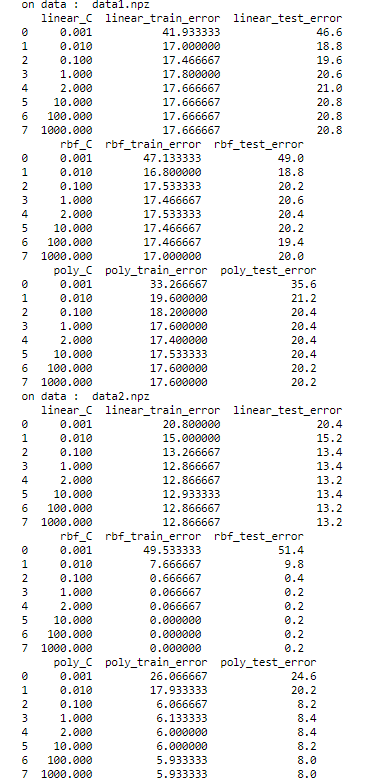

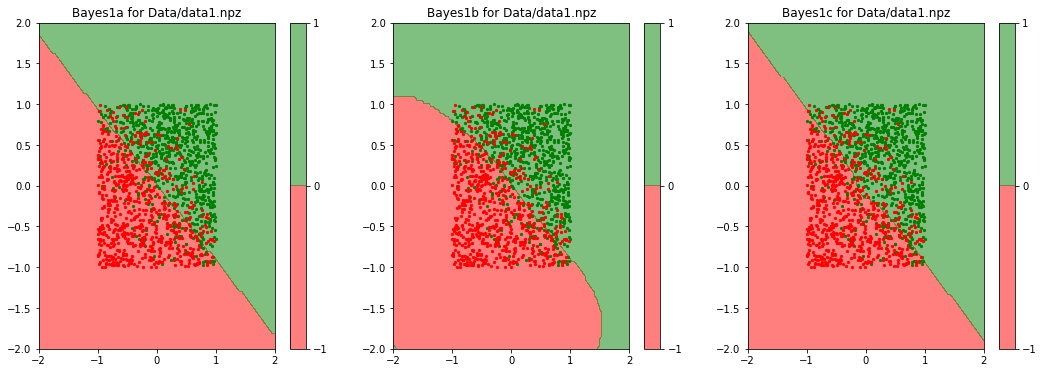

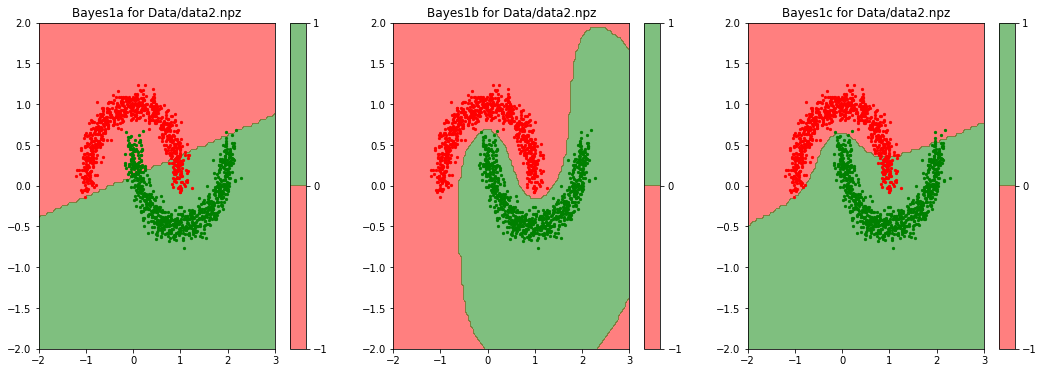

In [6]:
# Codewrite cell: 
# Generate plots of learned classifier for all three kernel types, on dataA and dataB.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

data_names = ['Data/data1.npz','Data/data2.npz']
for data_set in data_names :
    d_s_2   = np.load(data_set)
    X_train = d_s_2['arr1']
    Y_train = d_s_2['arr2']
    X_test  = d_s_2['arr3']
    Y_test  = d_s_2['arr4']
    
    X_train_plus = np.array([X_train[i] for i in range(len(Y_train)) if Y_train[i]==1])
    X_train_minus = np.array([X_train[i] for i in range(len(Y_train)) if Y_train[i]==-1])
    
    max_0   = round(np.max(X_train[:,0]))+1
    min_0   = round(np.min(X_train[:,0]))-1
    lim_0  = np.linspace(min_0,max_0,100)
    max_1   = round(np.max(X_train[:,1]))+1
    min_1   = round(np.min(X_train[:,1]))-1
    lim_1  = np.linspace(min_1,max_1,100)
    X_test_1,X_test_2 = np.meshgrid(lim_0,lim_1)

    Y_test_gr_a = np.zeros(X_test_1.shape)
    Y_test_gr_b = np.zeros(X_test_1.shape)
    Y_test_gr_c = np.zeros(X_test_1.shape)


    for i in range(Y_test_gr_a.shape[0]):
        X_test_gr = np.concatenate((X_test_1[i,:],X_test_2[i,:]))
        X_test_gr = X_test_gr.reshape(2,Y_test_gr_a.shape[0])
        X_test_gr = np.transpose(X_test_gr)
        
        if(data_set=='Data/data1.npz'):    
            Y_test_gr_a[i,:] = get_predictions(X_train,Y_train,X_test_gr, 'linear', 1)
            Y_test_gr_b[i,:] = get_predictions(X_train,Y_train,X_test_gr, 'rbf', 0.1)
            Y_test_gr_c[i,:] = get_predictions(X_train,Y_train,X_test_gr, 'poly', 2)
        elif(data_set=='Data/data2.npz'):    
            Y_test_gr_a[i,:] = get_predictions(X_train,Y_train,X_test_gr, 'linear', 1)
            Y_test_gr_b[i,:] = get_predictions(X_train,Y_train,X_test_gr, 'rbf', 1)
            Y_test_gr_c[i,:] = get_predictions(X_train,Y_train,X_test_gr, 'poly', 0.1)

        # print(X_test_gr)
    
    plt.figure(figsize=(18,6))
    
    plt.subplot(1,3,1)
    d = plt.contourf(X_test_1,X_test_2,Y_test_gr_a,levels =np.arange(-1,2),colors = ('r','g'),alpha =0.5)
    plt.title('Bayes1a '+'for '+ str(data_set))
    plt.scatter(X_train_plus[:,0],X_train_plus[:,1],color = 'g',s = 5)
    plt.scatter(X_train_minus[:,0],X_train_minus[:,1],color = 'r', s = 5)
    plt.colorbar(d)
    
    plt.subplot(1,3,2)
    d = plt.contourf(X_test_1,X_test_2,Y_test_gr_b,levels =np.arange(-1,2),colors = ('r','g'),alpha =0.5)
    plt.scatter(X_train_plus[:,0],X_train_plus[:,1],color = 'g',s=5)
    plt.scatter(X_train_minus[:,0],X_train_minus[:,1],color = 'r',s=5)
    plt.title('Bayes1b '+'for '+ str(data_set))
    plt.colorbar(d)
    
    plt.subplot(1,3,3)
    d = plt.contourf(X_test_1,X_test_2,Y_test_gr_c,levels =np.arange(-1,2),colors = ('r','g'),alpha =0.5)
    plt.scatter(X_train_plus[:,0],X_train_plus[:,1],color = 'g',s=5)
    plt.scatter(X_train_minus[:,0],X_train_minus[:,1],color = 'r',s=5)
    plt.title('Bayes1c '+'for '+ str(data_set))
    plt.colorbar(d)

# SVM in Higher Dimension

Similar as previous part, write code for choosing best hyperparameters for each kernel type. You may use sklearn.svm for this purpose. (use a part of training set as validation set)


Since this data is in Higher dimension, you can not illustrate the learned classifier. 
So for each classification data set, report the best kernel and regularisation parameters for linear, RBF and Poly kernels. Report the training and test zero-one error for those hyperparameters.



In [7]:
## MAKE YOUR DIRECTORY STRUCTURE TO CONTAIN DATA FOLDER IN THE FOLLOWING WAY.

dataC = np.load("Data/data3.npz")
print (dataC.files)

## Training data = arr1, arr2 
## Test data = arr3, arr4


['arr1', 'arr2', 'arr3', 'arr4']


In [8]:
# CodeWrite cell
# Write SVM classifier using SKlearn
# write only functions here

In [9]:
# CodeWrite cell
# Write code here for doing validation (for kernel_param and regularisation_param)
# on a subset of the training set. 
# Also for generating the numbers that you report below.

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error and test zero-one error for all three kernel choices, for all datasets.

Paremeter values C = [0.001, 0.01, 0.1, 1, 2, 10, 100, 1000]

Best choice of hyperparameters on validation set :

data3.npz -> Kernel : poly, C : 1